In [20]:
#Importing Library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### 1. Reading data into pandas dataframe

In [3]:
df=pd.read_table("Programming_Part1_TTI_Challenge.csv")

In [4]:
df.head(6)

,Class,PartNo,X,Y
0,AAA,X135,0.21,1.124
1,AAA,X126,0.21,1.179
2,EBHA,X195,0.32,1.191
3,EBHA,X194,0.82,1.249
4,AAA,X139,0.81,1.255
5,EBHA,X164,1.21,1.388


### 2. Compute min,max, standard deviation, and the geometric mean for X, Y

In [5]:
df.describe().loc[['min','max','std','mean']]

,X,Y
min,0.210000,1.124000
max,10.020000,7.498000
std,2.672921,1.734591
mean,5.499100,3.525130


### 3. Write Dataframe to SQL

In [ ]:
df.to.sql(table_name, connection object)



### 4. Generate Predictive Model

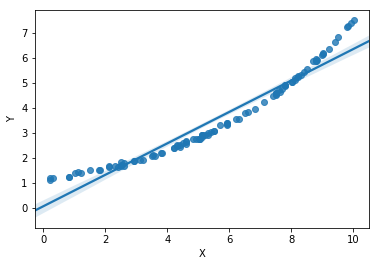

In [24]:
# After seeing the data we observed that we can apply linear regression on it, as it is y is continous variable
# As X is increasing Y is also increasing and it is closed to the best fit line
import seaborn as sns
sns.regplot(x="X", y="Y", data=df)


#### Splitting into testing training Datasetwith cross validation for better prediction

In [7]:
y1 = df.iloc[:,3:4]
X1=df.iloc[:,2:3]

In [8]:
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4)

D:\python\a\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
prediction=lm.predict(X1_test)

### 5. Checking the accuracy of our Predictive model

In [11]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, prediction))
print('MSE:', metrics.mean_squared_error(y1_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, prediction)))

MAE: 0.325528580981
MSE: 0.170745555271
RMSE: 0.413213692018


We see that our model is a good model as it is having low error